In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pylab as plt
import plotnine as p9
from dagger.graph import DAG
from dagger.query import Query
from dagger.common import make_fake_df, normalise
from datasets import parse_alcohol, parse_milk, parse_suicide, parse_nobel

In [2]:
df = parse_suicide().merge(parse_milk()).merge(parse_alcohol())

In [3]:
df.groupby(["alcohol", "suicide"]).apply(lambda d: len(d))

alcohol  suicide
high     high       8009
         low        4579
low      high       1379
         low        2233
medium   high       4028
         low        5416
dtype: int64

In [4]:
df_beer = pd.read_csv("../data/drinking.csv")
df_beer = df_beer.rename(str.lower, axis=1)[["country", "total"]]

In [5]:
pltr = (pd.read_csv("../data/who_suicide_statistics.csv")
      .dropna()
      .assign(rate=lambda d: d.suicides_no/d.population)
      .loc[lambda d: d.year == 2015]
      .merge(df_beer))
pltr.head(2)

,country,year,sex,age,suicides_no,population,rate,total
0,Argentina,2015,female,15-24 years,153.0,3394201.0,0.000045,9.3
1,Argentina,2015,female,25-34 years,114.0,3235582.0,0.000035,9.3


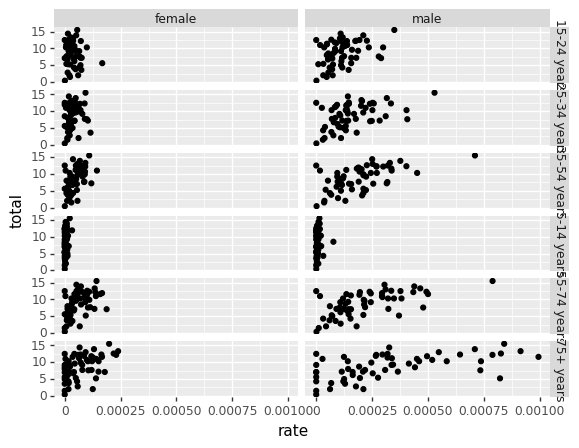

<ggplot: (-9223372036536293460)>

In [6]:
(p9.ggplot() + 
  p9.geom_point(data=pltr, mapping=p9.aes("rate", "total")) + 
  p9.facet_grid("age ~ sex"))

In [7]:
dag = (DAG(df)
       .add_edge("sex", "suicide")
       .add_edge("age", "suicide")
       .add_edge("country", "suicide")
       .add_edge("country", "milk")
       .add_edge("country", "alcohol"))

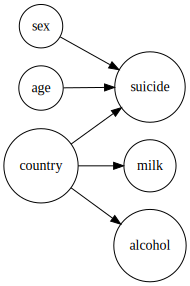

In [8]:
dag.plot()

In [9]:
dag = (DAG(df)
       .add_edge("sex", "suicide")
       .add_edge("age", "suicide")
       .add_edge("country", "suicide")
       .add_edge("country", "milk")
       .add_edge("country", "alcohol"))

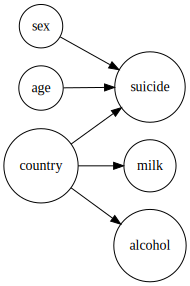

In [10]:
dag.plot()

In [11]:
Query(dag).given(alcohol="low").infer()["suicide"]

{'high': 0.5231633130556909, 'low': 0.47683668694430753}